In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [532]:
titanic = pd.read_csv('data/titanic_clean.csv')

In [533]:
titanic.head()

,Passengerid,Pclass,Survived,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S


## Exploratory Data Analysis

In [534]:
titanic.isna().sum()

Passengerid       0
Pclass            0
Survived          0
Sex               0
Age             263
Sibsp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [535]:
titanic.corr()

,Passengerid,Pclass,Survived,Age,Sibsp,Parch,Fare
Passengerid,1.000000,0.897822,-0.293717,-0.343888,0.065594,0.003584,-0.481215
Pclass,0.897822,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
Survived,-0.293717,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
Age,-0.343888,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
Sibsp,0.065594,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
Parch,0.003584,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
Fare,-0.481215,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000


In [536]:
titanic.describe()

,Passengerid,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,378.020061,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,328.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [537]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Survived     1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   Sibsp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 112.6+ KB


In [538]:
#upper_outlier = train_df.Fare.quantile(0.95)
#train_data = train_df[train_df.Fare < upper_outlier].copy()

## Handling missing values for age and fare

In [539]:
titanic.Age.fillna(titanic.groupby(['Pclass']).Age.transform('mean'), inplace = True)

In [540]:
sum(titanic.Age.isna())

0

In [541]:
titanic.Fare.fillna(titanic.groupby(['Pclass']).Fare.transform('mean'), inplace = True)

In [542]:
sum(titanic.Fare.isna())

0

## Handling missing values in Cabin-column by dropping the whole column

In [543]:
titanic.drop(columns=['Cabin'], inplace = True)

## Feature engineering

# Implementing logistic regression from scratch

In [544]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [545]:
def calculate_loss(Y, y_hat):
    """Calculates the binary cross entropy loss"""
    m = len(Y)
    loss = (-1/m)*np.sum((Y*np.log(y_hat)) + (1-Y)*np.log(1-y_hat))
    return loss

In [546]:
def gradient_descent(X, Y, num_iterations=50000, learning_rate=0.001, plot_cost=True):
    X = np.vstack([np.ones(X.shape[0]), X.T])
    theta = np.zeros(X.shape[0]).reshape(-1, 1) # initializing weights and bias
    m = len(Y)
    costs = []
    
    y_hat = sigmoid(np.dot(X.T, theta))
    cost = calculate_loss(Y, y_hat)
    
    for i in range(num_iterations):
        theta = theta - learning_rate*((1/m)*np.dot(X, (y_hat-Y)))
        y_hat = sigmoid(np.dot(X.T, theta))
        cost = calculate_loss(Y, y_hat)
        
        if plot_cost and i % 1000 == 0:
            print(f'The cost at iteration {i} is {cost}')
        if plot_cost and i % 10 == 0:
            costs.append(cost)
        
    if plot_cost:
        plt.plot(costs)
        plt.xlabel('Number of iterations (per tenth)')
        plt.ylabel('Cost')
        plt.title('Learning rate = ' + str(learning_rate))
    
    return y_hat, theta, cost

In [547]:
def predict(X, model, decision_boundary=0.5):
    X = np.vstack([np.ones(X.shape[0]), X.T])
    y_hat = sigmoid(np.dot(X.T, model))
    return np.where(y_hat > decision_boundary, 1, 0)

In [548]:
def score():
    pass

## Splitting dataset into train- and test-sets.

In [549]:
titanic.shape

(1309, 10)

In [550]:
def shuffle_and_split_data(X, y, train_size):
    X_train = X.sample(frac=train_size, random_state = 42)
    X_test = X.loc[~X.index.isin(X_train.index)].copy()
    X_test = X_test.sample(frac=1, random_state = 42)
    
    y_train = y.sample(frac=train_size, random_state = 42)
    y_test = y.loc[~y.index.isin(y_train)].copy()
    y_test = y_test.sample(frac=1, random_state = 42)
    
    return (X_train, X_test, y_train, y_test)

# Training the model

In [551]:
y = titanic['Survived'].values.reshape(-1,1)
dummies = pd.get_dummies(titanic[['Pclass', 'Sex', 'Embarked']], drop_first=True)
X = pd.concat([dummies, titanic[['Age', 'Fare', 'Sibsp', 'Parch']]], axis=1).values

In [552]:
from sklearn.model_selection import train_test_split

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [554]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 8), (393, 8), (916, 1), (393, 1))

The cost at iteration 0 is 0.6580895820349894
The cost at iteration 1000 is 0.5795402953404699
The cost at iteration 2000 is 0.5622228136163286
The cost at iteration 3000 is 0.5499359711328001
The cost at iteration 4000 is 0.5401588408519364
The cost at iteration 5000 is 0.5321853051341614
The cost at iteration 6000 is 0.5256045938198856
The cost at iteration 7000 is 0.5201251922585
The cost at iteration 8000 is 0.5155282830473433
The cost at iteration 9000 is 0.5116450320774303
The cost at iteration 10000 is 0.5083428887757868
The cost at iteration 11000 is 0.505516556499325
The cost at iteration 12000 is 0.5030816837823551
The cost at iteration 13000 is 0.500970267240791
The cost at iteration 14000 is 0.4991272015130233
The cost at iteration 15000 is 0.49750763725767844
The cost at iteration 16000 is 0.496074929732602
The cost at iteration 17000 is 0.4947990302826472
The cost at iteration 18000 is 0.4936552159309185
The cost at iteration 19000 is 0.4926230802630476
The cost at iterat

The cost at iteration 165000 is 0.4644949133451304
The cost at iteration 166000 is 0.4644546824703124
The cost at iteration 167000 is 0.46441508820826366
The cost at iteration 168000 is 0.46437612015656465
The cost at iteration 169000 is 0.46433776808921023
The cost at iteration 170000 is 0.4643000219535026
The cost at iteration 171000 is 0.4642628718670015
The cost at iteration 172000 is 0.4642263081145282
The cost at iteration 173000 is 0.46419032114522585
The cost at iteration 174000 is 0.464154901569671
The cost at iteration 175000 is 0.46412004015703895
The cost at iteration 176000 is 0.4640857278323201
The cost at iteration 177000 is 0.46405195567358676
The cost at iteration 178000 is 0.4640187149093088
The cost at iteration 179000 is 0.46398599691571935
The cost at iteration 180000 is 0.463953793214227
The cost at iteration 181000 is 0.4639220954688751
The cost at iteration 182000 is 0.4638908954838475
The cost at iteration 183000 is 0.46386018520101907
The cost at iteration 184

The cost at iteration 325000 is 0.46211707569165433
The cost at iteration 326000 is 0.4621136709723548
The cost at iteration 327000 is 0.4621103171233957
The cost at iteration 328000 is 0.4621070133740714
The cost at iteration 329000 is 0.46210375896558087
The cost at iteration 330000 is 0.4621005531508392
The cost at iteration 331000 is 0.4620973951942917
The cost at iteration 332000 is 0.4620942843717318
The cost at iteration 333000 is 0.4620912199701204
The cost at iteration 334000 is 0.46208820128741074
The cost at iteration 335000 is 0.46208522763237314
The cost at iteration 336000 is 0.46208229832442504
The cost at iteration 337000 is 0.4620794126934622
The cost at iteration 338000 is 0.4620765700796939
The cost at iteration 339000 is 0.46207376983347975
The cost at iteration 340000 is 0.4620710113151696
The cost at iteration 341000 is 0.4620682938949467
The cost at iteration 342000 is 0.4620656169526719
The cost at iteration 343000 is 0.4620629798777321
The cost at iteration 344

The cost at iteration 485000 is 0.4619085840888884
The cost at iteration 486000 is 0.4619082687532104
The cost at iteration 487000 is 0.4619079580323002
The cost at iteration 488000 is 0.4619076518583049
The cost at iteration 489000 is 0.461907350164376
The cost at iteration 490000 is 0.4619070528846545
The cost at iteration 491000 is 0.4619067599542562
The cost at iteration 492000 is 0.46190647130925705
The cost at iteration 493000 is 0.46190618688667884
The cost at iteration 494000 is 0.46190590662447506
The cost at iteration 495000 is 0.46190563046151706
The cost at iteration 496000 is 0.4619053583375801
The cost at iteration 497000 is 0.46190509019333026
The cost at iteration 498000 is 0.46190482597031063
The cost at iteration 499000 is 0.46190456561092863


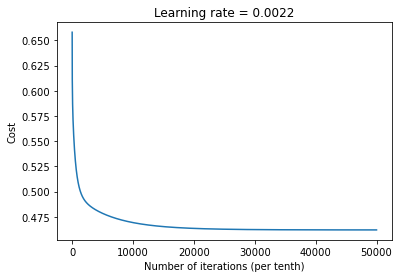

In [584]:
_, params, _ = gradient_descent(X_train, y_train, 500000, 0.0022)

In [585]:
predictions = predict(X_test, params)

In [586]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [587]:
confusion_matrix(y_test, predictions)

array([[205,  19],
       [ 57, 112]])

In [588]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       224
           1       0.85      0.66      0.75       169

    accuracy                           0.81       393
   macro avg       0.82      0.79      0.80       393
weighted avg       0.81      0.81      0.80       393



In [589]:
accuracy_score(y_test, predictions)

0.806615776081425

## Comparing my model with a simple model that predicts survival for females/death for males

In [568]:
base_rate_sex_model = titanic.Sex.map({'male':0, 'female':1})

In [569]:
print(classification_report(titanic.Survived, base_rate_sex_model))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       809
           1       0.73      0.68      0.70       500

    accuracy                           0.78      1309
   macro avg       0.77      0.76      0.76      1309
weighted avg       0.78      0.78      0.78      1309



In [570]:
accuracy_score(titanic.Survived, base_rate_sex_model)

0.7799847211611918